<a href="https://colab.research.google.com/github/masahiro-t3927/KIKAGAKU/blob/master/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

w=  [-1.21310401e-01  4.44664254e-02  1.13416945e-02  2.51124642e+00
 -1.62312529e+01  3.85906801e+00 -9.98516565e-03 -1.50026956e+00
  2.42143466e-01 -1.10716124e-02 -1.01775264e+00  6.81446545e-03
 -4.86738066e-01]
b=  37.93710774183309
train score :  0.7645451026942549
test score :  0.6733825506400171
予測値:  24.935707898576915
目標値:  22.6


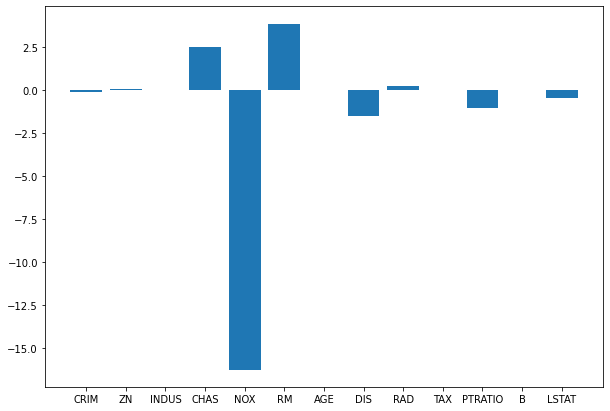

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

"""
---前処理部分
"""
#データ読み込み
dataset = load_boston() #ボストン近郊の住宅価格のデータセット。
x, t = dataset.data, dataset.target #data:入力変数。価格算出のための材料。　target：目的変数。住宅価格。
columns = dataset.feature_names

#dfに値を読み込んでいく
df = pd.DataFrame(x, columns=columns)
df.head(3) #表示するのは最初から３行のみ

# 目標値(Target)をdfのヘッダと値に追加
df['Target'] = t
df.head(3)

# 入力変数と目的変数の切り分け
t = df['Target'].values #目的変数
x = df.drop(labels=['Target'], axis=1).values  #目的変数の列（axis＝1）を削除し、残りを入力変数とする
# 入力変数、目的変数をそれぞれ学習/評価用の2つに分割
#test_size=0.3:学習データ７割、テストデータ３割として設定。
#random_state=0:データセットの固定を実施。実行のたびにデータセットが異なることを避ける。
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=0)

"""
---モデル部分
"""
#step1 モデル定義
model = LinearRegression() #重回帰分析でモデル構築
#step2 モデルの学習
model.fit(x_train, t_train)

# 学習後のパラメータ w 
print("w= ", model.coef_)

# パラメータの分布をヒストグラムで可視化
plt.figure(figsize=(10, 7))
plt.bar(x=columns, height=model.coef_);

# 学習後のバイアス b
print("b= ", model.intercept_)

# Step 3：学習モデルの検証
#LinerRegressionでは、score()メソッドで決定係数がリターンできる。（0~1の範囲、１に近いほど性能が良い）
print('train score : ', model.score(x_train, t_train))
print('test score : ', model.score(x_test, t_test))

#推論実施
y=model.predict(x_test)
     
print('予測値: ', y[0])
print('目標値: ', t_test[0])

# モデルの定義、ハイパーパラメータの値を設定
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1)

# モデルの学習
ridge.fit(x_train, t_train)
# モデルの検証
print('train score : ', ridge.score(x_train, t_train))
print('test score : ', ridge.score(x_test, t_test))